In [35]:
import pandas as pd
import numpy as np
import plotly.express as px
import json
import plotly.graph_objects as go

In [2]:
m_f_counts = pd.read_csv('data/movie_MF_data_2_10.csv')  

/tmp/ipykernel_8663/2533052815.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  m_f_counts = pd.read_csv('data/movie_MF_data_2_10.csv')


In [3]:
means = m_f_counts[m_f_counts['wiki_id'] == 'means']

In [4]:
means

,wiki_id,total_M_2,total_F_2,c_o_M_2,c_o_F_2,pure_M_2,pure_F_2,total_M_3,total_F_3,c_o_M_3,...,c_o_M_10,c_o_F_10,pure_M_10,pure_F_10,total_M_sent,total_F_sent,c_o_M_sent,c_o_F_sent,pure_M_sent,pure_F_sent
22756,means,10.582484,5.293417,0.785156,0.762788,9.797328,4.530629,10.582484,5.293417,1.037704,...,2.271313,2.023422,8.311171,3.269995,10.582484,5.293417,2.987783,2.510371,7.5947,2.783046


In [5]:
df_barplot_means = pd.DataFrame()

for i in range(2, 11):
    co_m = 'c_o_M_'+str(i)
    co_f = 'c_o_F_'+str(i)
    pure_m = 'pure_M_'+str(i)
    pure_f = 'pure_F_'+str(i)
    rows = []
    rows.append({'n': i, 'type': 'M without F', 'count':means.iloc[0][pure_m], 'sex':'M'})
    rows.append({'n': i, 'type': 'F without M', 'count':means.iloc[0][pure_f], 'sex':'F'})
    rows.append({'n': i, 'type': 'M with F', 'count':means.iloc[0][co_m], 'sex':'M'})
    rows.append({'n': i, 'type': 'F with M', 'count':means.iloc[0][co_f], 'sex':'F'})
    for row in rows:
        df_barplot_means = df_barplot_means.append(row, ignore_index=True)

rows_sent = []

rows_sent.append({'n': 1000, 'type': 'M without F', 'count':means.iloc[0]['pure_M_sent'], 'sex':'M'})
rows_sent.append({'n': 1000, 'type': 'F without M', 'count':means.iloc[0]['pure_F_sent'], 'sex':'F'})
rows_sent.append({'n': 1000, 'type': 'M with F', 'count':means.iloc[0]['c_o_M_sent'], 'sex':'M'})
rows_sent.append({'n': 1000, 'type': 'F with M', 'count':means.iloc[0]['c_o_F_sent'], 'sex':'F'})

for row in rows_sent:
    df_barplot_means = df_barplot_means.append(row, ignore_index=True)

/tmp/ipykernel_8663/3540181487.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_barplot_means = df_barplot_means.append(row, ignore_index=True)
/tmp/ipykernel_8663/3540181487.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_barplot_means = df_barplot_means.append(row, ignore_index=True)
/tmp/ipykernel_8663/3540181487.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_barplot_means = df_barplot_means.append(row, ignore_index=True)
/tmp/ipykernel_8663/3540181487.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_barplot_means = df_barplot_means.append(row, ignore_index=True)
/tmp/ipykernel_8663/3540181487.py:14: Fu

In [6]:
df_barplot_means

,n,type,count,sex
0,2,M without F,9.797328,M
1,2,F without M,4.530629,F
2,2,M with F,0.785156,M
3,2,F with M,0.762788,F
4,3,M without F,9.544779,M
5,3,F without M,4.300888,F
6,3,M with F,1.037704,M
7,3,F with M,0.992529,F
8,4,M without F,9.299438,M
9,4,F without M,4.081078,F


# FINAL PLOT NR 1

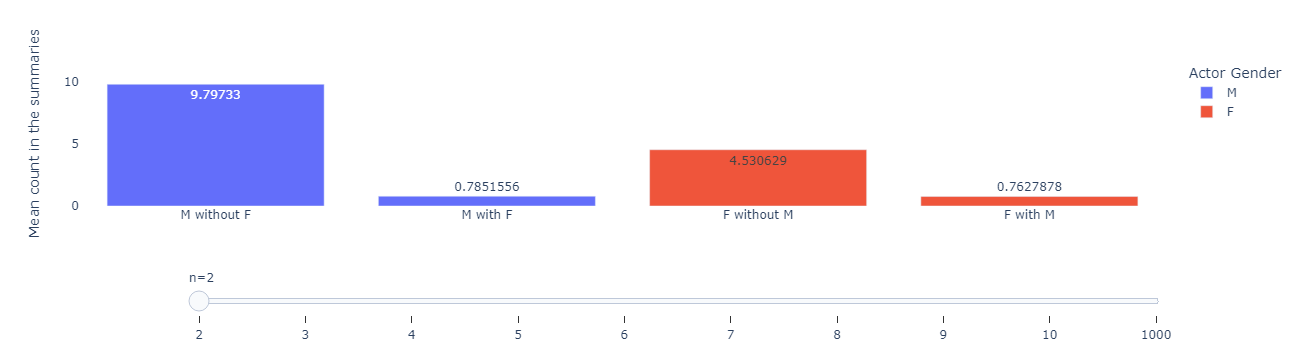

In [186]:
# generate the plot
fig = px.bar(
    df_barplot_means,
    x="type",
    y="count",
    color="sex",
    orientation="v",
    animation_frame="n",
    text_auto=True,
    labels={"type": "",
            "count": "Mean count in the summaries",
            "sex": "Actor Gender"},
)

fig["layout"].pop("updatemenus")


fig.update_layout(yaxis={"range":[0,df_barplot_means["count"].max()*1.2]}, paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)')


In [8]:
# Movie metadata
movie_md_cols = [
'Wikipedia movie ID',
'Freebase movie ID',
'Movie name',
'Movie release date',
'Movie box office revenue',
'Movie runtime',
'Movie languages (Freebase ID:name tuples)',
'Movie countries (Freebase ID:name tuples)',
'Movie genres (Freebase ID:name tuples)',
]
movie_md = pd.read_csv('data/movie.metadata.tsv', sep='\t', names=movie_md_cols)
print('Number of movies:', movie_md.shape[0])
movie_md.head(2)

Number of movies: 81741


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


In [9]:
movie_md['Movie release year'] = pd.to_datetime(movie_md['Movie release date'], errors='coerce').dt.year

In [10]:
movie_md.head(2)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0


In [11]:
# Format the movies table to see one genre per row
def get_values_json(data):
    data = json.loads(data)
    values = ""
    for key, value in data.items():
        values += value + ","
    return values[:-1]

df_movie_genre = movie_md
df_movie_genre['Movie genres (Freebase ID:name tuples)'] = movie_md['Movie genres (Freebase ID:name tuples)'].apply(lambda json: get_values_json(json))
df_movie_genre['Movie genres (Freebase ID:name tuples)'] = df_movie_genre['Movie genres (Freebase ID:name tuples)'].str.split(',')
df_movie_genre = movie_md.explode('Movie genres (Freebase ID:name tuples)')
df_movie_genre = df_movie_genre[['Wikipedia movie ID', 'Movie genres (Freebase ID:name tuples)']]
df_movie_genre = df_movie_genre.rename(columns={'Wikipedia movie ID':'wiki_id',
                                                'Movie genres (Freebase ID:name tuples)':'genre'})

In [12]:
df_movie_genre.head(2)

,wiki_id,genre
0,975900,Thriller
0,975900,Science Fiction


In [13]:
genre_occurences = df_movie_genre['genre'].value_counts()
# Resets the index and renames the columns
genre_occurences = genre_occurences.to_frame().reset_index().rename(columns={'genre':'count', 'index':'genre'})

In [14]:
genre_occurences

,genre,count
0,Drama,34007
1,Comedy,16349
2,Romance Film,10234
3,Black-and-white,9094
4,Action,8798
...,...,...
359,Romantic thriller,1
360,Comdedy,1
361,C-Movie,1
362,Silhouette animation,1


In [15]:
m_f_counts

,wiki_id,total_M_2,total_F_2,c_o_M_2,c_o_F_2,pure_M_2,pure_F_2,total_M_3,total_F_3,c_o_M_3,...,c_o_M_10,c_o_F_10,pure_M_10,pure_F_10,total_M_sent,total_F_sent,c_o_M_sent,c_o_F_sent,pure_M_sent,pure_F_sent
0,21487047,2.000000,5.000000,2.000000,2.000000,0.000000,3.000000,2.000000,5.000000,2.000000,...,2.000000,2.000000,0.000000,3.000000,2.000000,5.000000,2.000000,2.000000,0.0000,3.000000
1,15930359,40.000000,10.000000,0.000000,0.000000,40.000000,10.000000,40.000000,10.000000,0.000000,...,4.000000,3.000000,36.000000,7.000000,40.000000,10.000000,9.000000,7.000000,31.0000,3.000000
2,26968376,10.000000,0.000000,0.000000,0.000000,10.000000,0.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,10.000000,0.000000,10.000000,0.000000,0.000000,0.000000,10.0000,0.000000
3,24426458,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0000,0.000000
4,1470989,25.000000,5.000000,3.000000,2.000000,22.000000,3.000000,25.000000,5.000000,3.000000,...,6.000000,4.000000,19.000000,1.000000,25.000000,5.000000,8.000000,4.000000,17.0000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22752,16718585,67.000000,0.000000,0.000000,0.000000,67.000000,0.000000,67.000000,0.000000,0.000000,...,0.000000,0.000000,67.000000,0.000000,67.000000,0.000000,0.000000,0.000000,67.0000,0.000000
22753,15533528,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0000,0.000000
22754,15290864,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.0000,0.000000
22755,5787216,30.000000,1.000000,0.000000,0.000000,30.000000,1.000000,30.000000,1.000000,0.000000,...,1.000000,1.000000,29.000000,0.000000,30.000000,1.000000,1.000000,1.000000,29.0000,0.000000


In [16]:
df_summary_genre = df_movie_genre.join(m_f_counts[['wiki_id', 'total_M_2', 'total_F_2']].set_index('wiki_id'), on='wiki_id').dropna()
df_summary_genre = df_summary_genre[['genre', 'total_M_2', 'total_F_2']].rename(columns={'total_M_2': 'M', 'total_F_2':'F'})
df_summary_genre.head(2)

,genre,M,F
0,Thriller,8.0,10.0
0,Science Fiction,8.0,10.0


In [17]:
df_genre_means = df_summary_genre.groupby('genre').mean().reset_index()
# Computes the % of women
df_genre_means['F_ratio'] = df_genre_means['F']/(df_genre_means['F']+df_genre_means['M'])
# Remove unsignificant results with 0 and 0 in M and F
df_genre_means = df_genre_means[(df_genre_means.M+df_genre_means.F != 0)]
# Sorts by decreasing women representation
df_genre_means = df_genre_means.sort_values(by='F_ratio', ascending=False)
df_genre_means.head(10)

,genre,M,F,F_ratio
316,Travel,0.0,2.000000,1.0
129,Family & Personal Relationships,0.0,3.000000,1.0
192,Law & Crime,0.0,5.500000,1.0
142,Filipino,0.0,8.333333,1.0
225,Operetta,0.0,1.500000,1.0
312,Tokusatsu,0.0,2.000000,1.0
268,Sci Fi Pictures original films,0.0,17.000000,1.0
147,Filmed Play,0.0,1.000000,1.0
240,Pornography,0.0,9.000000,1.0
318,War effort,0.0,13.000000,1.0


In [18]:
#Joins with genre occurences
df_genre_means = df_genre_means.merge(genre_occurences, on='genre').dropna()
# Drops values <= 100
df_genre_means = df_genre_means[df_genre_means['count'] >= 100]

df_genre_means['F_ratio'] = df_genre_means['F_ratio']*100

In [19]:
best_5_genre_summaries = df_genre_means.head(5)[['genre', 'F_ratio']]
worst_5_genre_summaries = df_genre_means.tail(5)[['genre', 'F_ratio']]

In [20]:
best_5_genre_summaries

,genre,F_ratio
12,Social issues,83.333333
19,Pornographic movie,74.074074
21,Sexploitation,68.085106
22,Filipino Movies,67.717996
26,Culture & Society,64.285714


In [21]:
worst_5_genre_summaries

,genre,F_ratio
277,Prison,13.750000
278,Historical Epic,13.209393
280,Short Film,13.023583
281,Historical drama,12.326044
285,Propaganda film,10.948905


In [22]:
# Character metadata
char_md_cols = ['Wikipedia movie ID',
'Freebase movie ID',
'Movie release date',
'Character name',
'Actor date of birth',
'Actor gender',
'Actor height (in meters)',
'Actor ethnicity (Freebase ID)',
'Actor name',
'Actor age at movie release',
'Freebase character/actor map ID',
'Freebase character ID',
'Freebase actor ID',
]
char_md = pd.read_csv('data/character.metadata.tsv', sep='\t', names=char_md_cols)
char_md.head(2)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.78,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4


In [23]:
char_to_gender = char_md[['Wikipedia movie ID', 'Actor gender']].dropna()
# 1 if woman, 0 if man
char_to_gender = char_to_gender.replace({'Actor gender': {'F': 1,'M': 0}})

In [24]:
char_to_gender.head(2)

,Wikipedia movie ID,Actor gender
0,975900,1
1,975900,1


In [25]:
df_ratio_cast = (
    char_to_gender.groupby('Wikipedia movie ID', as_index=False)
        .agg(f_occ=('Actor gender', 'sum'),
             tot_chars=('Actor gender', 'count'))
).rename(columns={'Wikipedia movie ID': 'wiki_id'})
df_ratio_cast['m_occ'] = df_ratio_cast['tot_chars']-df_ratio_cast['f_occ']

In [26]:
df_ratio_cast

,wiki_id,f_occ,tot_chars,m_occ
0,330,4,4,0
1,3217,3,13,10
2,3333,6,14,8
3,3746,3,14,11
4,3837,2,20,18
...,...,...,...,...
63647,37322106,2,3,1
63648,37373877,3,6,3
63649,37476824,4,10,6
63650,37478048,1,4,3


In [27]:
df_cast_genre = df_movie_genre.join(df_ratio_cast[['wiki_id', 'f_occ', 'm_occ']].set_index('wiki_id'), on='wiki_id').dropna()
df_cast_genre = df_cast_genre[['genre', 'f_occ', 'm_occ']]
df_cast_genre.head(2)

,genre,f_occ,m_occ
0,Thriller,6.0,11.0
0,Science Fiction,6.0,11.0


In [28]:
df_cast_genre_means = df_cast_genre.groupby('genre').mean().reset_index()
# Computes the % of women
df_cast_genre_means['F_ratio'] = df_cast_genre_means['f_occ']/(df_cast_genre_means['f_occ']+df_cast_genre_means['m_occ'])
# Remove unsignificant results with 0 and 0 in M and F
df_cast_genre_means = df_cast_genre_means[(df_cast_genre_means.m_occ+df_cast_genre_means.f_occ != 0)]
# Sorts by decreasing women representation
df_cast_genre_means = df_cast_genre_means.sort_values(by='F_ratio', ascending=False)
df_cast_genre_means.head(10)

,genre,f_occ,m_occ,F_ratio
290,Romantic thriller,1.000000,0.000000,1.000000
348,War effort,2.000000,1.000000,0.666667
178,Health & Fitness,2.000000,1.000000,0.666667
353,Women in prison films,3.764706,2.294118,0.621359
255,Pinku eiga,2.000000,1.272727,0.611111
57,C-Movie,12.000000,8.000000,0.600000
166,Gender Issues,2.035714,1.464286,0.581633
136,Family & Personal Relationships,1.142857,0.857143,0.571429
274,Race movie,2.000000,1.500000,0.571429
311,Softcore Porn,2.524590,2.213115,0.532872


In [29]:
#Joins with genre occurences
df_cast_genre_means = df_cast_genre_means.merge(df_genre_means['genre'], on='genre').dropna()

In [30]:
df_cast_genre_means['F_ratio'] = df_cast_genre_means['F_ratio']*100

In [31]:
best_5_genre_cast = df_cast_genre_means.head(5)[['genre', 'F_ratio']]
worst_5_genre_cast = df_cast_genre_means.tail(5)[['genre', 'F_ratio']]

In [32]:
best_5_genre_cast

,genre,F_ratio
0,Adult,50.907029
1,Sexploitation,48.571429
2,Erotica,48.035230
3,Pornographic movie,47.759563
4,Filipino Movies,45.521215


In [42]:
worst_5_genre_cast

,genre,F_ratio
145,Western,20.130698
146,Costume Adventure,20.022624
147,Concert film,18.012422
148,Spaghetti Western,15.447154
149,Combat Films,9.883721


## SECOND PLOT TO SHOW 

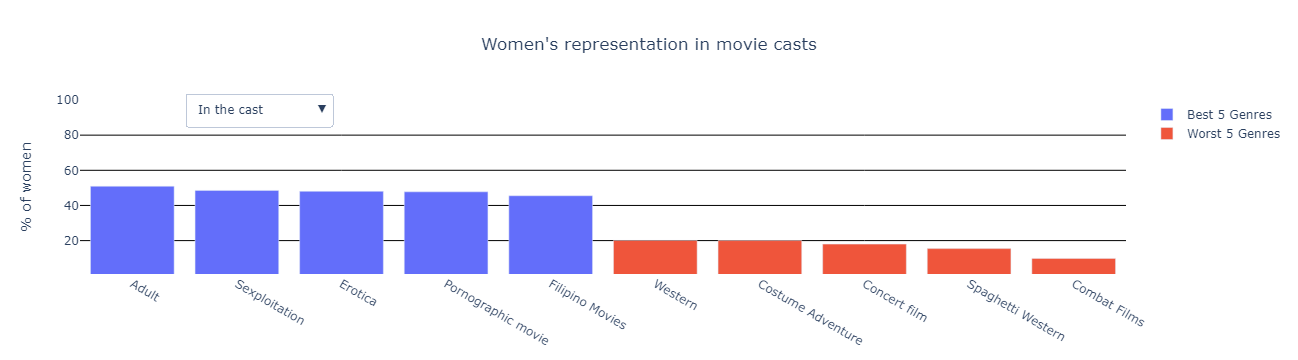

In [180]:

fig = go.Figure(data=[go.Bar(
    name='Best 5 Genres',
    x=best_5_genre_cast['genre'],
    y=best_5_genre_cast['F_ratio']
),
    go.Bar(
    name='Worst 5 Genres',
    x=worst_5_genre_cast['genre'],
    y=worst_5_genre_cast['F_ratio']
),
    go.Bar(
    name='Best 5 Genres',
    x=best_5_genre_summaries['genre'],
    y=best_5_genre_summaries['F_ratio'],
    visible=False
),
    go.Bar(
    name='Worst 5 Genres',
    x=worst_5_genre_summaries['genre'],
    y=worst_5_genre_summaries['F_ratio'],
    visible=False
)
])

fig.update_yaxes(title_text="% of women", range=[1, 100])


# Add dropdown
fig.update_layout(
    title="Women's representation in movie casts",
    title_x = 0.5,
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(
                    label="In the cast",
                    method="update",
                    args=[{"visible": [True, True, False, False]},
                          {"title": "Women's representation in movie casts"}]),
                dict(
                    label="In the summaries",
                    method="update",
                    args=[{"visible": [False, False, True, True]},
                          {"title": "Women's representation in movie summaries",}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ],
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

fig.update_yaxes(gridcolor='black')


fig.show()

In [109]:
year_ratio_cast = df_ratio_cast
# Compute the ratio
year_ratio_cast['F_ratio_c'] = df_ratio_cast['f_occ']/df_ratio_cast['tot_chars']
year_ratio_cast = year_ratio_cast[['wiki_id', 'F_ratio_c']].dropna()
# Merge to get movie release year
year_ratio_cast = year_ratio_cast.merge(movie_md, left_on='wiki_id', right_on='Wikipedia movie ID')[['F_ratio_c', 'Movie release year']]
# Take the mean per year
year_ratio_cast = year_ratio_cast.groupby('Movie release year').mean().reset_index()
year_ratio_cast.head(2)

,Movie release year,F_ratio_c
0,1888.0,0.5
1,1891.0,0.0


In [117]:
year_ratio_summaries = m_f_counts[['wiki_id', 'total_M_2', 'total_F_2']].rename(
                                                                        columns={'total_M_2': 'M', 'total_F_2':'F'})
# Compute ratio
year_ratio_summaries['F_ratio_s'] = year_ratio_summaries['F']/(year_ratio_summaries['F']+year_ratio_summaries['M'])
year_ratio_summaries = year_ratio_summaries[['wiki_id', 'F_ratio_s']].dropna()
# Merge to get movie release year
year_ratio_summaries = year_ratio_summaries.merge(movie_md, left_on='wiki_id', right_on='Wikipedia movie ID')[['F_ratio_s', 'Movie release year']]
year_ratio_summaries = year_ratio_summaries.groupby('Movie release year').mean().reset_index()
year_ratio_summaries.head(2)

,Movie release year,F_ratio_s
0,1896.0,0.0
1,1900.0,0.0


In [196]:
y_r_c_cropped = year_ratio_cast[(year_ratio_cast['Movie release year'] >= 1941)]
y_r_c_cropped = y_r_c_cropped[y_r_c_cropped['Movie release year'] <= 2012]
y_r_c_cropped['F_ratio_c'] = y_r_c_cropped['F_ratio_c']*100

In [198]:
y_r_s_cropped = year_ratio_summaries[year_ratio_summaries['Movie release year'] >= 1941]
y_r_s_cropped = y_r_s_cropped[y_r_s_cropped['Movie release year'] <= 2012]
y_r_s_cropped['F_ratio_s'] = y_r_s_cropped['F_ratio_s']*100

In [1]:
fig = go.Figure(
    data=[
        go.Scatter(
            name='Women in the cast',
            x=y_r_c_cropped['Movie release year'],
            y=y_r_c_cropped['F_ratio_c']
        ),
        go.Scatter(
            name='Women in the summaries',
            x=y_r_s_cropped['Movie release year'],
            y=y_r_s_cropped['F_ratio_s']
        )])

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title="Women's representation through the years",
    title_x = 0.5,
)


fig.update_xaxes(title_text='year', showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title_text="% of women", range=[1, 50], showline=True, linewidth=2, linecolor='black', gridcolor='black')

fig.show()

NameError: name 'go' is not defined